# How to group and aggregate data in pandas

### How do we group a dataset (DataFrame in pandas) and perform aggregate functions on them ?

Firstly we need to load in a dataset into a pandas DataFrame. I will use the weather data for Durham from 1880 onwards

In [2]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("C:\\Users\\darki\\Documents\\Jupyter\\Durham.csv")


Let's look at the data

In [3]:
df.head()

,year,month,tmax,tmin,afdays,rainmm,sunhrs,Comment
0,1880,1,4.2,-1.4,22.0,13.5,NaN,NaN
1,1880,2,8.7,0.6,12.0,44.3,NaN,NaN
2,1880,3,9.2,1.0,12.0,32.5,NaN,NaN
3,1880,4,11.6,2.7,2.0,51.5,NaN,NaN
4,1880,5,14.1,3.7,4.0,38.1,NaN,NaN


### Group the Data by year

In [5]:
year_grp = df.groupby(["year"])

Now show the data for one of the groups using the <b>get_group</b> function, passing in one of the values e.g. 1971, string values must be in single quotes. In this case the yyyy is numeric field

In [6]:
year_grp.get_group(1971)

,year,month,tmax,tmin,afdays,rainmm,sunhrs,Comment
1092,1971,1,6.3,1.2,11.0,45.8,26.9,NaN
1093,1971,2,7.8,1.3,7.0,16.7,83.4,NaN
1094,1971,3,8.2,1.8,9.0,62.0,91.0,NaN
1095,1971,4,10.7,3.5,3.0,48.8,120.2,NaN
1096,1971,5,15.5,5.9,1.0,47.7,258.8,NaN
1097,1971,6,14.8,7.6,0.0,59.0,139.0,NaN
1098,1971,7,20.7,11.1,0.0,32.3,203.4,NaN
1099,1971,8,18.2,10.9,0.0,127.7,123.4,NaN
1100,1971,9,18.2,9.3,0.0,12.8,140.4,NaN
1101,1971,10,14.4,6.5,5.0,20.9,98.9,NaN


At this point the results should match what would be returned from the main DataFrame <b>df</b> if we used a filter

In [7]:
filt = (df['year'] == 1971) ##& (df['month'] == 1)
filtered = df.loc[filt]

In [8]:
filtered.type

AttributeError: 'DataFrame' object has no attribute 'type'

The counts of each value in the returned data using <b>value_counts()</v>

In [7]:
df.loc[filt]['tmax'].value_counts()

18.2    2
6.3     1
7.8     1
8.2     1
10.7    1
15.5    1
14.8    1
20.7    1
14.4    1
8.4     1
9.1     1
Name: tmax, dtype: int64

In [8]:
year_grp['tmax'].value_counts()

year  tmax
1880  4.2     1
      6.3     1
      8.2     1
      8.7     1
      9.2     1
             ..
2021  12.1    1
      14.1    1
      19.4    1
      19.6    1
      21.5    1
Name: tmax, Length: 1658, dtype: int64

In [9]:
year_grp['tmax'].value_counts().loc[1971]

tmax
18.2    2
6.3     1
7.8     1
8.2     1
8.4     1
9.1     1
10.7    1
14.4    1
14.8    1
15.5    1
20.7    1
Name: tmax, dtype: int64

In [10]:
year_grp['tmax'].value_counts().loc[2021]

tmax
5.1     1
7.4     1
11.0    1
12.1    1
14.1    1
19.4    1
19.6    1
21.5    1
Name: tmax, dtype: int64

In [11]:
year_grp['tmax'].mean()

year
1880    12.333333
1881    11.500000
1882    12.500000
1883    12.672727
1884    13.100000
          ...    
2017    13.675000
2018    13.708333
2019    13.525000
2020    13.758333
2021    13.775000
Name: tmax, Length: 142, dtype: float64

In [12]:
year_grp['tmin'].mean()

year
1880    3.966667
1881    3.533333
1882    4.666667
1883    4.390909
1884    4.508333
          ...   
2017    6.283333
2018    5.900000
2019    6.025000
2020    6.191667
2021    5.587500
Name: tmin, Length: 142, dtype: float64

In [13]:
year_grp['tmax'].mean().loc[1971]

12.691666666666668

In [14]:
year_grp['tmin'].mean().loc[1971]

5.466666666666666

Create a new DataFrame for the year against mean (tmax)

In [15]:
mean_year_grp = year_grp['tmax'].agg(['mean'])

In [16]:
mean_year_grp

,mean
year,
1880,12.333333
1881,11.500000
1882,12.500000
1883,12.672727
1884,13.100000
...,...
2017,13.675000
2018,13.708333
2019,13.525000


We can sort the data from this new DataFrame

In [17]:
mean_year_grp.sort_values(by = 'mean', ascending = False)

,mean
year,
1990,13.883333
1949,13.883333
2014,13.866667
2003,13.833333
2011,13.833333
...,...
1963,11.316667
1922,11.241667
1902,11.191667


In [18]:
mean_year_grp.sort_values(by = 'mean', ascending = False).head(10)

,mean
year,
1990,13.883333
1949,13.883333
2014,13.866667
2003,13.833333
2011,13.833333
2021,13.775000
1989,13.775000
2020,13.758333
2018,13.708333


### A much simpler way to do this

We can do the grouping and the aggregation in one go

<AxesSubplot:xlabel='year'>

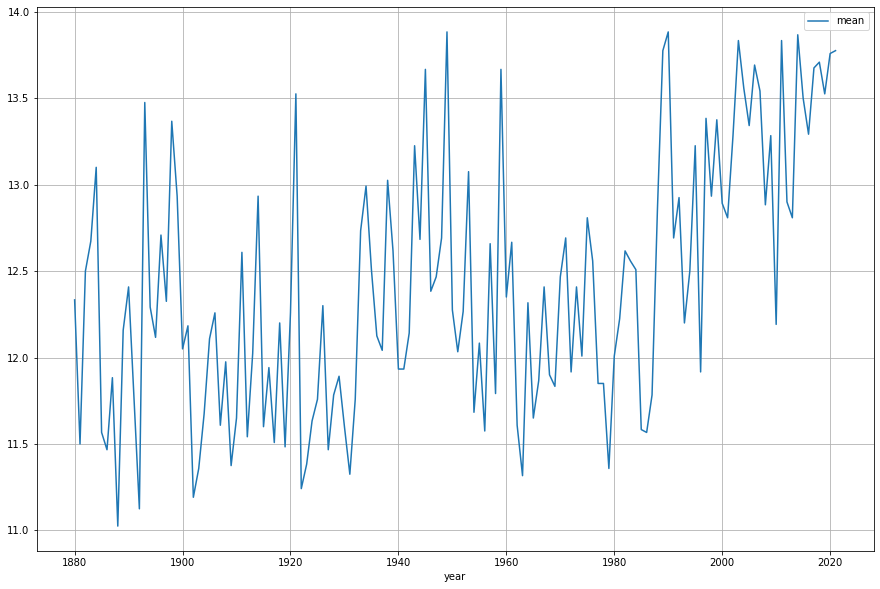

In [19]:
figuresize = [15,10]
year_mean_max_grp = df.groupby(["year"])['tmax'].agg(['mean'])
year_mean_max_grp.plot(grid = True,figsize=figuresize)


<AxesSubplot:xlabel='year'>

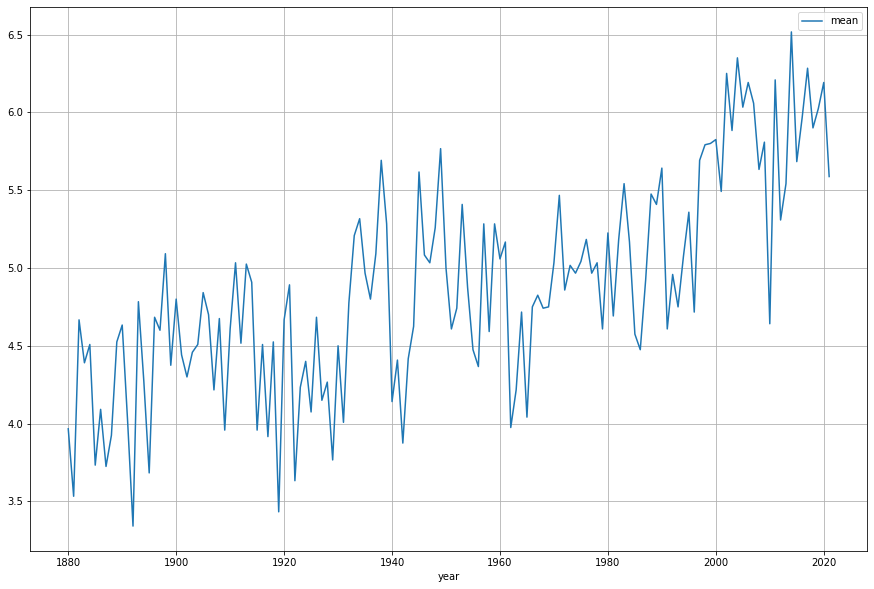

In [20]:
figuresize = [15,10]
year_mean_max_grp = df.groupby(["year"])['tmin'].agg(['mean'])
year_mean_max_grp.plot(grid=True, figsize=figuresize)


<AxesSubplot:xlabel='year'>

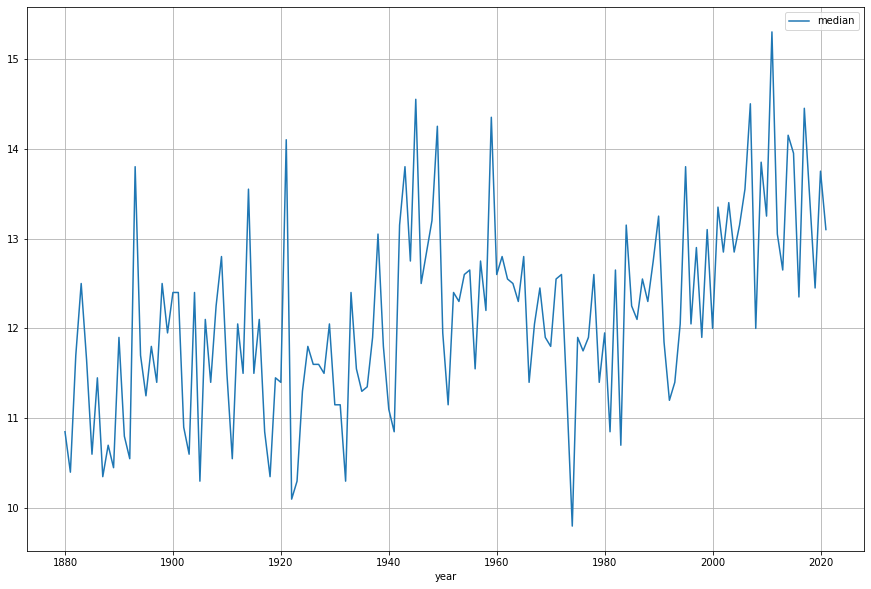

In [21]:
figuresize = [15,10]
year_median_grp = df.groupby(["year"])['tmax'].agg(['median'])
year_median_grp.plot(grid=True, figsize=figuresize)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

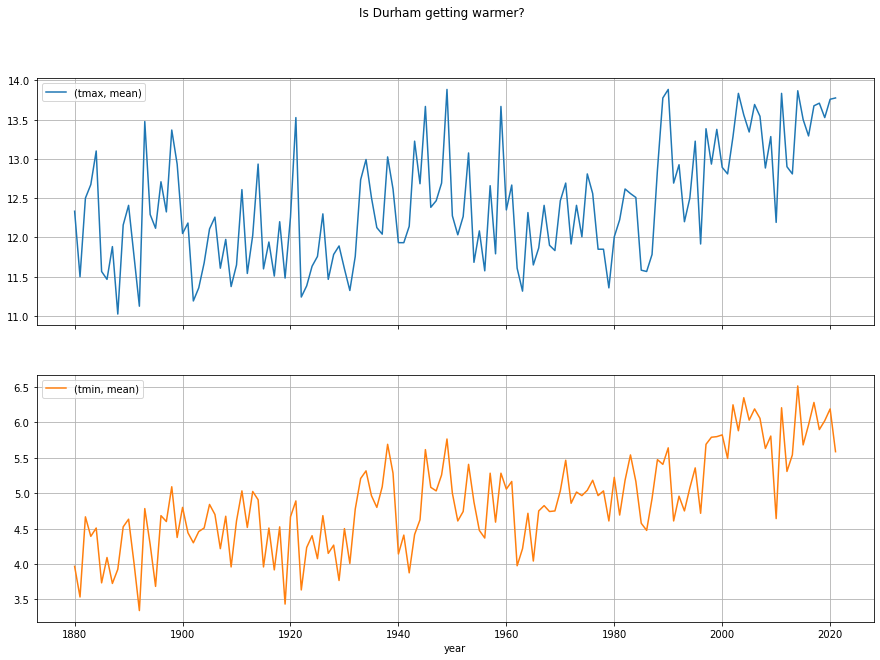

In [22]:
measures = ['tmax','tmin']
figuresize = [15,10]
graphtitle = "Is Durham getting warmer?"

year_median_grp = df.groupby(["year"])[measures].agg(['mean'])
year_median_grp.plot(kind='line', grid=True, subplots=True, figsize=figuresize, title=graphtitle)

### Now work out decades

In [23]:
def decade(year):
    yearstr = str(year)
    yearstr = yearstr[:3]
    yearstr = yearstr + '0'
    return int(yearstr)
   


In [24]:
df['decade'] = df['year'].apply(decade)

In [25]:
df

,year,month,tmax,tmin,afdays,rainmm,sunhrs,Comment,decade
0,1880,1,4.2,-1.4,22.0,13.5,NaN,NaN,1880
1,1880,2,8.7,0.6,12.0,44.3,NaN,NaN,1880
2,1880,3,9.2,1.0,12.0,32.5,NaN,NaN,1880
3,1880,4,11.6,2.7,2.0,51.5,NaN,NaN,1880
4,1880,5,14.1,3.7,4.0,38.1,NaN,NaN,1880
...,...,...,...,...,...,...,...,...,...
1695,2021,4,12.1,0.7,12.0,14.4,NaN,NaN,2020
1696,2021,5,14.1,5.0,2.0,81.8,NaN,NaN,2020
1697,2021,6,19.6,10.1,0.0,28.8,NaN,NaN,2020
1698,2021,7,21.5,12.8,0.0,69.0,NaN,NaN,2020


array([<AxesSubplot:title={'center':'(tmax, mean)'}, xlabel='decade'>,
       <AxesSubplot:title={'center':'(tmin, mean)'}, xlabel='decade'>],
      dtype=object)

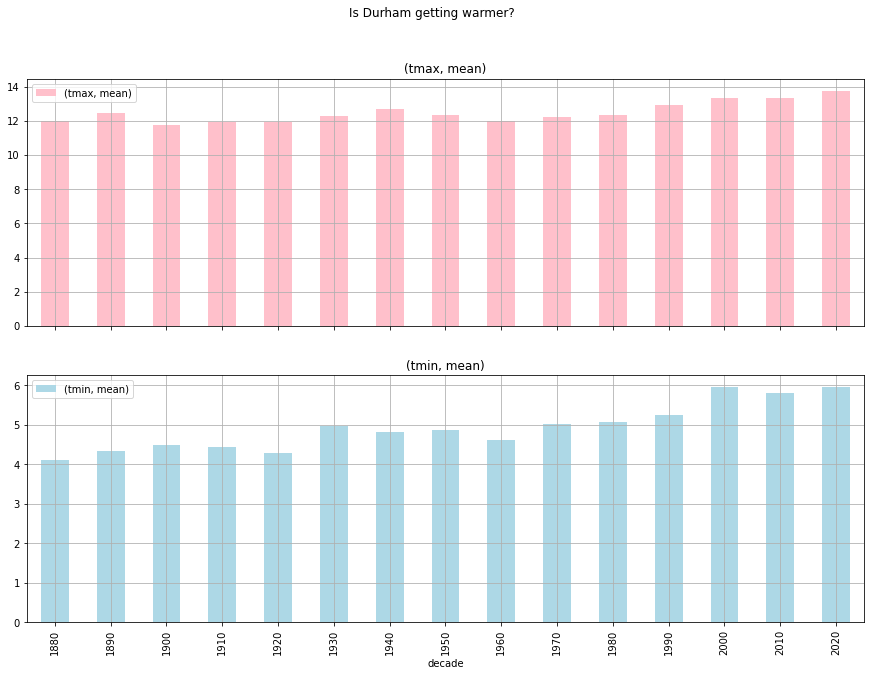

In [26]:
measures = ['tmax','tmin']
colors = ['Pink','LightBlue']
figuresize = [15,10]
graphtitle = "Is Durham getting warmer?"

decade_median_grp = df.groupby(["decade"])[measures].agg(['mean'])
decade_median_grp.plot(kind='bar', grid=True, subplots=True, figsize=figuresize, title=graphtitle, color = colors)

array([<AxesSubplot:title={'center':'(rainmm, mean)'}, xlabel='decade'>],
      dtype=object)

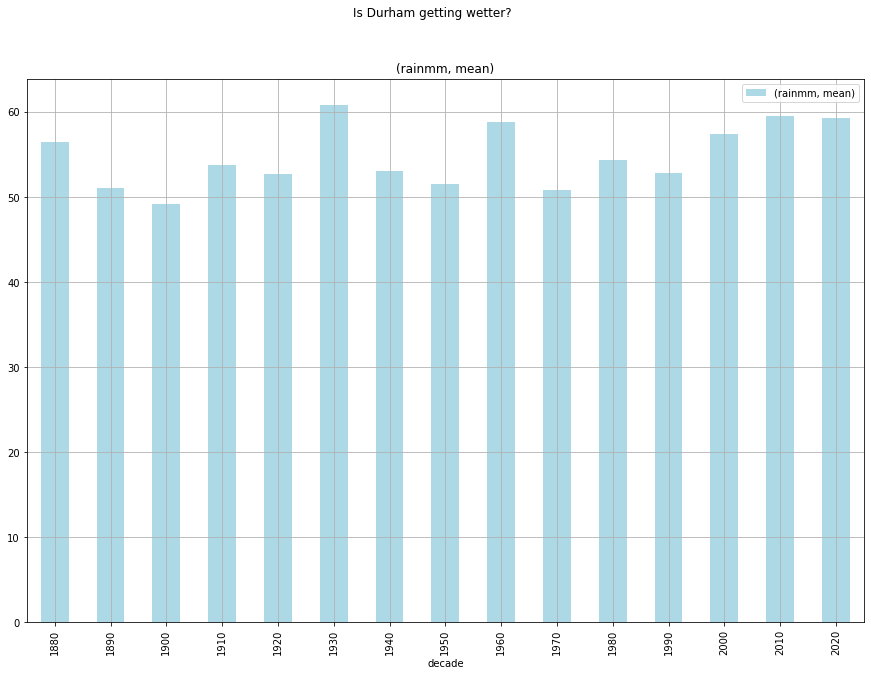

In [27]:
measures = ['rainmm']
colors = ['LightBlue']
figuresize = [15,10]
graphtitle = "Is Durham getting wetter?"

decade_median_grp = df.groupby(["decade"])[measures].agg(['mean'])
decade_median_grp.plot(kind='bar', grid=True, subplots=True, figsize=figuresize, title=graphtitle, color = colors)